In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dec6 = pd.read_csv('coinmarketcap_06122017.csv')

In [3]:
dec6

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000e+00,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,3.617670e-02,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,1.200500e-01,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,4.241800e-04,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,1.932000e-05,0.241754,5,XRP,9.999309e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,1321,NaN,NaN,turbocoin,1512368664,NaN,NaN,TurboCoin,NaN,NaN,8.12,1.000000e-08,0.000114,1322,TURBO,NaN
1322,1322,NaN,NaN,birds,1512535772,NaN,NaN,Birds,NaN,10.62,-42.10,1.000000e-08,0.000122,1323,BIRDS,NaN
1323,1323,NaN,NaN,bitcoincashscrypt,1512548078,NaN,NaN,BitcoinCashScrypt,-0.37,-37.39,-27.69,5.000000e-07,0.006202,1324,BCCS,2.502380e+06
1324,1324,NaN,NaN,swisscoin,1512540278,NaN,NaN,Swisscoin,NaN,4.39,-22.84,1.000000e-08,0.000123,1325,SIC,1.020000e+10


# Selecting the 'datasets', 'id' and the 'market_cap_usd' columns

In [4]:
market_cap_raw = dec6[['id', 'market_cap_usd']]

In [5]:
market_cap_raw

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
...,...,...
1321,turbocoin,NaN
1322,birds,NaN
1323,bitcoincashscrypt,NaN
1324,swisscoin,NaN


In [6]:
#ca = market_cap_raw[market_cap_raw['market_cap_usd'] > 0]

In [7]:
# type(ca)

# Discard the cryptocurrencies

In [8]:
cap = market_cap_raw.query('market_cap_usd >0')

In [9]:
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

In [10]:
cap.isna().any()

id                False
market_cap_usd    False
dtype: bool

In [11]:
cap10 = cap.head(10).set_index('id').sort_index()
#cap10 = cap.head(10).set_index('id', inplace = True ).sort_index() # for parmanent change

In [12]:
cap10

,market_cap_usd
id,
bitcoin,2.130493e+11
bitcoin-cash,2.529585e+10
bitcoin-gold,4.920065e+09
cardano,3.231420e+09
dash,5.794076e+09
ethereum,4.352945e+10
iota,1.475225e+10
litecoin,5.634498e+09
monero,4.331688e+09


In [13]:
# cap.agg(['count']) # convert in datadfarame

#  How big is Bitcoin compared with the rest of the cryptocurrencies?

In [14]:
TOP_CAP_TITLE = 'Top 10 market capitalization'                 # constant variables should be in Capitaliz 
TOP_CAP_YLABEL = '% of total cap'

In [15]:
# Selecting the first 10 rows and setting the index
cap10 = cap.iloc[:10].set_index('id')

In [16]:
# Calculating market_cap_perc      # assign fun add new coulnms
cap10 = cap10.assign(market_cap_perc = lambda x:
                     (x.market_cap_usd / cap.market_cap_usd.sum()) * 100)

In [17]:
cap10

,market_cap_usd,market_cap_perc
id,,
bitcoin,2.130493e+11,56.918669
ethereum,4.352945e+10,11.629410
bitcoin-cash,2.529585e+10,6.758088
iota,1.475225e+10,3.941238
ripple,9.365343e+09,2.502063
dash,5.794076e+09,1.547956
litecoin,5.634498e+09,1.505323
bitcoin-gold,4.920065e+09,1.314454
monero,4.331688e+09,1.157262


In [18]:
len(cap)

1031

In [19]:
cap10.iloc[0, 0]

213049346738.0

In [20]:
s = cap.market_cap_usd.sum()

In [21]:
market_cap_perc_list = []
for i in range(len(cap)):
    market_cap_perc_list.append(((cap.iloc[2, 1])/ s) * 100)

In [22]:
#cap10.columns = [col.replace('', '_').lower() for col in cap10.columns]

In [23]:
cap10

,market_cap_usd,market_cap_perc
id,,
bitcoin,2.130493e+11,56.918669
ethereum,4.352945e+10,11.629410
bitcoin-cash,2.529585e+10,6.758088
iota,1.475225e+10,3.941238
ripple,9.365343e+09,2.502063
dash,5.794076e+09,1.547956
litecoin,5.634498e+09,1.505323
bitcoin-gold,4.920065e+09,1.314454
monero,4.331688e+09,1.157262


In [24]:
ser1 = pd.Series(market_cap_perc_list)

In [25]:
pd.concat([cap10.reset_index(), ser1], axis = 0)

,0,id,market_cap_perc,market_cap_usd
0,NaN,bitcoin,56.918669,2.130493e+11
1,NaN,ethereum,11.629410,4.352945e+10
2,NaN,bitcoin-cash,6.758088,2.529585e+10
3,NaN,iota,3.941238,1.475225e+10
4,NaN,ripple,2.502063,9.365343e+09
...,...,...,...,...
1026,6.758088,NaN,NaN,NaN
1027,6.758088,NaN,NaN,NaN
1028,6.758088,NaN,NaN,NaN
1029,6.758088,NaN,NaN,NaN


In [26]:
cap10.head(2)

,market_cap_usd,market_cap_perc
id,,
bitcoin,2.130493e+11,56.918669
ethereum,4.352945e+10,11.629410


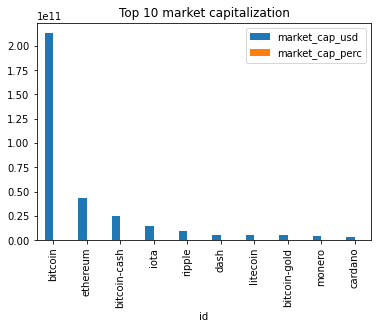

In [27]:
# Plotting the barplot with the title defined above 
ax = cap10.plot.bar(title=TOP_CAP_TITLE)

# Making the plot easier to read and more informative

In [28]:
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']


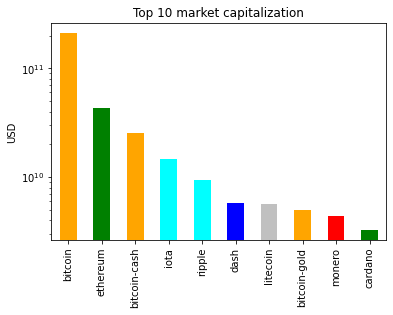

In [37]:
# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
ax = cap10.market_cap_usd.plot.bar(color=COLORS, logy=True, title=TOP_CAP_TITLE)
# Annotating the y axis with 'USD'
ax.set_ylabel('USD');
# Final touch! Removing the xlabel as it is not very informative
ax.set_xlabel('');

# What is going on?! Volatility in cryptocurrencies

In [30]:
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

In [31]:
# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values(by='percent_change_24h', ascending=True)

# Checking the first few rows
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


# Well, we can already see that things are a bit crazy

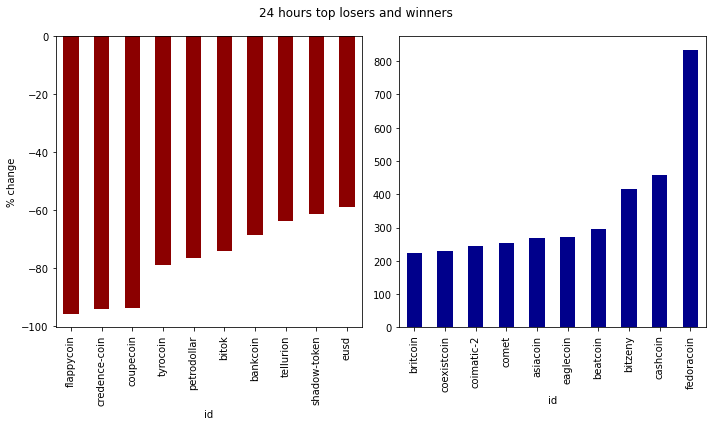

In [32]:
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6));
    
    # Plotting with pandas the barchart for the top 10 losers
    ax = volatility_series.iloc[:10].plot.bar(color='darkred', ax=axes[0])
    
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    
    # Setting the ylabel to '% change'
    ax.set_ylabel('% change')
    
    # Same as above, but for the top 10 winners
    ax = volatility_series.iloc[-10:].plot.bar(color='darkblue', ax=axes[1])
    
    plt.tight_layout()
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

# Ok, those are... interesting. Let's check the weekly Series too.

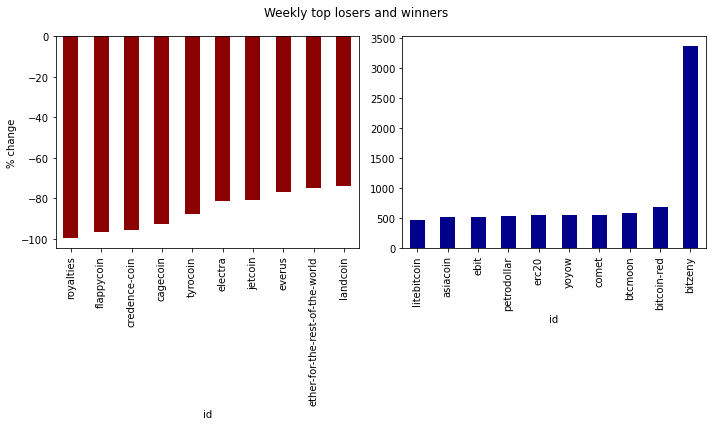

In [33]:
volatility7d = volatility.sort_values(by='percent_change_7d', ascending=True)

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

# How small is small?

In [39]:
largecaps = cap.query('market_cap_usd >= 10000000000')   # 10000000000 0r 1e + 10

# Printing out largecaps
largecaps.iloc[:5]

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


 # Most coins are tiny

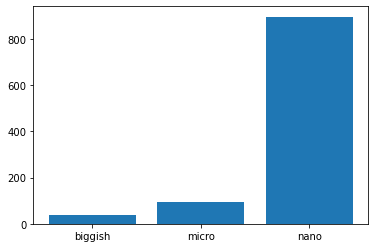

In [42]:
# "cap" DataFrame. Returns an int.
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd > 3E+8')

# Same as above for micro ...
micro = capcount('market_cap_usd > 50000000 and market_cap_usd < 300000000') # 5e + 7  & 3e + 8

# ... and for nano
nano =  capcount('market_cap_usd < 50000000')

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib 
plt.bar(height=values, x=LABELS);